# Part 2: Feature Engineering

### Content List
- [Imports](#Imports)
- [Check Data Types](#Check-Data-Types)
- [User-Submitted Text Features](#User-Submitted-Text-Features)
- [Ordinal Rankings](#Ordinal-Rankings)
- [One-Hot Encoding](#One-Hot-Encoding)
- [Interaction Features](#Interaction-Features)


### Imports
Similar imports as in Part 1

In [1]:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [85]:
data_ = pd.read_csv('./data/cleaned.csv')

In [86]:
data = data_

In [87]:
print(data.shape)

(1210906, 71)


### Check Data Types
This is an important step as we need to have a clear idea of which how many object columns remain as we need to get them into an interpretable format. 

In [88]:
data.dtypes.value_counts()

float64    54
object     15
int64       2
Name: count, dtype: int64

In [89]:
object_cols = data.select_dtypes(include='object').columns
object_cols

Index(['term', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'addr_state', 'application_type', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

The dataset will undergo the following encoding and transformation processes to prepare it for analysis and modeling:  

1. **Binarization**:  
   The following features will be binarized:  
   - `term`  
   - `verification_status`  
   - `payment_plan`  
   - `application_type`  
   - `hardship_flag`  
   - `disbursement_method`  
   - `debt_settlement_flag`  

2. **One-Hot Encoding**:  
   The following features will be one-hot encoded:  
   - `home_ownership`  
   - `purpose`  
   - `addr_state`  

3. **Ordinal Encoding**:  
   The following features will be encoded based on ordinal rank:  
   - `emp_length`  
   - `grade`  

4. **Text Feature Transformation**:  
   - The text columns `desc`, `emp_title`, and `title` will be measured by their length.  
   - These lengths will then be combined into a single feature for potential use in Natural Language Processing (NLP) tasks.  

5. **DateTime Conversion**:  
   - The text columns `issue_d` and `earliest_cr_line` will be converted into DateTime format.  
   - A new column will be created to represent the difference between these dates, which will then be converted into an integer for modeling purposes.  


In [90]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'desc', 'purpose',
       'title', 'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mort_acc', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'n

### User-Submitted Text Features

#### build an aggregate column of all text input

In [91]:
desc_length = []

[desc_length.append(len(i)) for i in data.desc]

data["desc_length"]= desc_length

In [92]:
data['desc_length'].head()

0    3
1    3
2    3
3    3
4    3
Name: desc_length, dtype: int64

In [93]:
data['all_text'] = data['desc'] + " " + data['emp_title'] + " " + data['title']

In [94]:
data['all_text'].head()

0                  .  leadman Debt consolidation
1                           .  Engineer Business
2                            .  truck driver  . 
3          .  Contract Specialist Major purchase
4     .  Veterinary Tecnician Debt consolidation
Name: all_text, dtype: object

#### Using List Comprehension, measure the lengths of each item dealing with user text input and return that as a new column

In [95]:
all_text_length = [len(i) for i in data['all_text']]
    
data["all_text_length"] = all_text_length

In [96]:
data['all_text_length'].value_counts()

all_text_length
38      60580
30      57492
39      56927
37      55074
35      51277
        ...  
782         1
817         1
937         1
999         1
1094        1
Name: count, Length: 973, dtype: int64

In [97]:
data.emp_title.head()

0                 leadman
1                Engineer
2            truck driver
3     Contract Specialist
4    Veterinary Tecnician
Name: emp_title, dtype: object

In [98]:
desc_length = [len(i) for i in data.desc]
    
data["desc_length"]= desc_length

In [99]:
emp_title_length = [len(i) for i in data.emp_title]

data["emp_title_length"] = emp_title_length

In [100]:
title_length = [len(i) for i in data.title]
    
data["title_length"] = title_length

### Ordinal Rankings
converting grade G:1 to A:7

In [101]:
#building a dictionary of values to identify and replace grade-  G:1 to A:7
length_dict = {'A':7,
               'B': 6,               
               'C': 5,
               'D': 4,
               'E': 3,
               'F': 2,
               'G': 1,}
data['grade'].replace(length_dict, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_13668\697013423.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['grade'].replace(length_dict, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_13668\697013423.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['grade'].replace(length_

In [102]:
data['grade'].head()

0    5
1    5
2    6
3    2
4    5
Name: grade, dtype: int64

In [103]:
#building a dictionary of values to identify and replace
length_dict = {'10+ years':10,
        '2 years': 2,
        '< 1 year': 0,
        '3 years': 3,
        '1 year': 1,
        '5 years': 5,
        '4 years': 4,
        '6 years': 6,
        '8 years': 8,
        '7 years': 7,
        '9 years': 9}
data['emp_length'].replace(length_dict, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_13668\1744365477.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['emp_length'].replace(length_dict, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_13668\1744365477.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['emp_length'].r

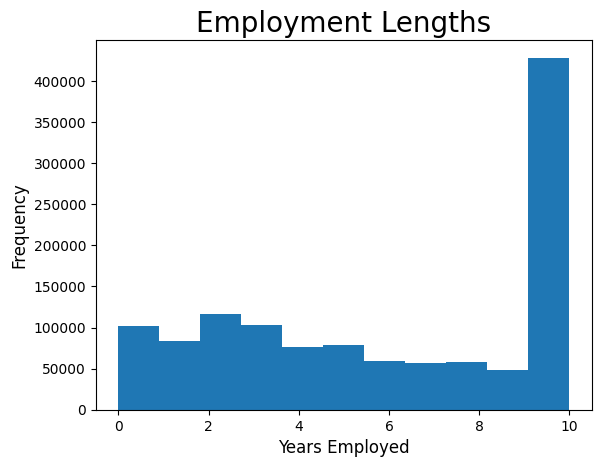

In [104]:
plt.hist(data['emp_length'], bins=11)
plt.title('Employment Lengths', size=20);
plt.xlabel('Years Employed', size=12);
plt.ylabel('Frequency', size=12);

In [105]:
data['emp_length'].value_counts(normalize=True)

emp_length
10    0.353633
2     0.095727
3     0.084659
0     0.084487
1     0.069488
5     0.065368
4     0.062566
6     0.048762
8     0.048173
7     0.046742
9     0.040395
Name: proportion, dtype: float64

In [106]:
data['emp_length'].mean()

5.997059226727756

In [107]:
# Find the mean employment length of people whose loans did or did not succeed.

data.groupby(by='classes')['emp_length'].mean()

classes
0    5.860851
1    6.033932
Name: emp_length, dtype: float64

### One-Hot Encoding
- purpose
- verification_status
- addr_state
- pymnt_plan
- initial_list_status
- application_type
- hardship_flag
- disbursement_method
- debt_settlement_flag

In [108]:
len(data.columns)

76

In [109]:
## all remaining object cols
object_cols

Index(['term', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'addr_state', 'application_type', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [110]:
data['term'].head()

0     36 months
1     36 months
2     60 months
3     60 months
4     36 months
Name: term, dtype: object

#### Purpose

In [111]:
data['purpose'].value_counts()

purpose
debt_consolidation    710586
credit_card           270419
home_improvement       76917
other                  66739
major_purchase         25060
medical                13252
small_business         12448
car                    11737
moving                  8085
vacation                7788
house                   6281
wedding                  848
renewable_energy         746
Name: count, dtype: int64

In [112]:
data.groupby(by='classes')['purpose'].value_counts(normalize= True)

classes  purpose           
0        debt_consolidation    0.617561
         credit_card           0.188380
         other                 0.059608
         home_improvement      0.057523
         major_purchase        0.020580
         small_business        0.015711
         medical               0.011843
         moving                0.007896
         car                   0.007400
         vacation              0.006299
         house                 0.005974
         renewable_energy      0.000744
         wedding               0.000481
1        debt_consolidation    0.578500
         credit_card           0.232778
         home_improvement      0.065144
         other                 0.053899
         major_purchase        0.020726
         medical               0.010701
         car                   0.010313
         small_business        0.008810
         vacation              0.006467
         moving                0.006347
         house                 0.004974
         wed

In [113]:
one_hot = ['purpose', 'term',
'verification_status',
'pymnt_plan',
'application_type',
'hardship_flag', 'addr_state',
'disbursement_method', 
'debt_settlement_flag', 'home_ownership']

In [114]:
data = pd.get_dummies(data= data, columns = one_hot, drop_first=True)

In [115]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'emp_title', 'emp_length', 'annual_inc', 'desc',
       ...
       'addr_state_WI', 'addr_state_WV', 'addr_state_WY',
       'disbursement_method_DirectPay', 'debt_settlement_flag_Y',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT'],
      dtype='object', length=141)

In [116]:
len(data.columns)

141

In [138]:
num_cols = data.select_dtypes(include=('int64', 'float64')).columns

X = data[num_cols].drop(columns='classes')
y = data['classes']

In [141]:
print(X.columns)  # This should show all feature columns
print(y.head())   # This should show the target 'classes'

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
       'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mort_acc',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_30dpd',
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
     

In [142]:
# Calculate correlation between features and target 'classes'
corr_with_target = X.corrwith(y).sort_values(ascending=False)

# Display the correlation
print(corr_with_target)

last_fico_range_high       0.676471
last_fico_range_low        0.576524
last_pymnt_amnt            0.365640
grade                      0.267092
fico_range_low             0.127869
                             ...   
out_prncp_inv             -0.215422
out_prncp                 -0.215432
int_rate                  -0.266967
collection_recovery_fee   -0.468686
recoveries                -0.487781
Length: 61, dtype: float64


In [146]:
# Select features with correlation greater than 0.3 or less than -0.3
selected_features = corr_with_target[abs(corr_with_target) > 0.1]
print(selected_features)


last_fico_range_high       0.676471
last_fico_range_low        0.576524
last_pymnt_amnt            0.365640
grade                      0.267092
fico_range_low             0.127869
fico_range_high            0.127868
acc_open_past_24mths      -0.103102
out_prncp_inv             -0.215422
out_prncp                 -0.215432
int_rate                  -0.266967
collection_recovery_fee   -0.468686
recoveries                -0.487781
dtype: float64


In [151]:
# Select top 20 features with highest correlation
top_features = corr_with_target.abs().sort_values(ascending=False).head(20)
print(top_features)

last_fico_range_high       0.676471
last_fico_range_low        0.576524
recoveries                 0.487781
collection_recovery_fee    0.468686
last_pymnt_amnt            0.365640
grade                      0.267092
int_rate                   0.266967
out_prncp                  0.215432
out_prncp_inv              0.215422
fico_range_low             0.127869
fico_range_high            0.127868
acc_open_past_24mths       0.103102
dti                        0.094116
num_tl_op_past_12m         0.087883
mort_acc                   0.080323
bc_open_to_buy             0.078072
loan_amnt                  0.077418
funded_amnt                0.077416
funded_amnt_inv            0.077404
avg_cur_bal                0.077212
dtype: float64


In [154]:
# save the data of top 20 features and target 'classes' to a new dataframe
data_top_features = data[top_features.index]
data_top_features['classes'] = data['classes']

# save the data to a new csv file
data_top_features.to_csv('./data/cleaned_FEATURES.csv', index=False)


C:\Users\USER\AppData\Local\Temp\ipykernel_13668\2164752713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top_features['classes'] = data['classes']
